In [ ]:
!gdown 1gU3OPgbAv5v8117Mea6L5QA8fdENw9dw
!gdown 1zAi63MFphOS-lj514VEL9A_gbxpF1G9j
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1gU3OPgbAv5v8117Mea6L5QA8fdENw9dw
To: /content/train_data.csv
100% 8.01M/8.01M [00:00<00:00, 217MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zAi63MFphOS-lj514VEL9A_gbxpF1G9j
To: /content/test_data.csv
100% 1.94M/1.94M [00:00<00:00, 145MB/s]


In [ ]:
df['telematics_ind'].value_counts()

,count
telematics_ind,
-2,58015
1,7404
0,7317
-1,7264


In [ ]:
df['bi_limit_group']=df['bi_limit_group'].replace(['CSLGrp1','CSLGrp3','CSLGrp2'],'CLSGrp')
df['bi_limit_group']=df['bi_limit_group'].replace(['SPGrp3','SPGrp2','SPGrp1Miss','SPGrp4'],'SPGrp')
df['household_group']=df['household_group'].replace(['3other','3autodwellingumb'],'3dwellingCombo')

In [ ]:
df.head()

,id,12m_call_history,acq_method,ann_prm_amt,bi_limit_group,channel,digital_contact_ind,geo_group,has_prior_carrier,home_lot_sq_footage,...,household_policy_counts,newest_veh_age,pay_type_code,pol_edeliv_ind,prdct_sbtyp_grp,product_sbtyp,telematics_ind,tenure_at_snapshot,trm_len_mo,call_counts
0,1,3,missing,669.21,NonAuto,Others,1,suburban,0,57249,...,1,-20,type1,1,B,type1,-2,0,12,27
1,2,0,method4,606.45,NonAuto,Retail,1,urban,0,133481,...,1,-20,type1,1,A,type1,-2,71,12,0
2,3,0,method2,677.06,SPGrp,Retail,0,urban,0,18540,...,2,8,type3,0,A,type3,1,18,6,0
3,4,0,method2,1317.32,NonAuto,Retail,0,urban,0,63624,...,1,-20,type1,0,B,type1,-2,59,12,29
4,5,0,method3,2238.37,SPGrp,Retail,0,suburban,1,4867,...,2,55,type1,0,A,type1,0,24,6,25


In [ ]:
df['channel']=df['channel'].replace({'Others':1,'Retail':2})
df['geo_group']=df['geo_group'].replace({'rural':1,'suburban':2,'urban':3})
df['household_group']=df['household_group'].replace({'3dwellingCombo':3,'2autodwelling':2,'1dwelling':1})
df['bi_limit_group']=df['bi_limit_group'].replace({'CLSGrp':1,'SPGrp':2,'NonAuto':3})
df=df.drop(columns=['product_sbtyp'])
df=pd.get_dummies(df,columns=['acq_method','pay_type_code', 'prdct_sbtyp_grp'],prefix=['acq_method','pay_type_code', 'prdct_sbtyp_grp'],dtype=int)

<ipython-input-7-2ceda9c0e72f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['channel']=df['channel'].replace({'Others':1,'Retail':2})
<ipython-input-7-2ceda9c0e72f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['geo_group']=df['geo_group'].replace({'rural':1,'suburban':2,'urban':3})
<ipython-input-7-2ceda9c0e72f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futu

In [ ]:
df.head()

,id,12m_call_history,ann_prm_amt,bi_limit_group,channel,digital_contact_ind,geo_group,has_prior_carrier,home_lot_sq_footage,household_group,...,acq_method_method2,acq_method_method3,acq_method_method4,acq_method_missing,pay_type_code_type1,pay_type_code_type2,pay_type_code_type3,prdct_sbtyp_grp_A,prdct_sbtyp_grp_B,prdct_sbtyp_grp_C
0,1,3,669.21,3,1,1,2,0,57249,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,606.45,3,2,1,3,0,133481,1,...,0,0,1,0,1,0,0,1,0,0
2,3,0,677.06,2,2,0,3,0,18540,2,...,1,0,0,0,0,0,1,1,0,0
3,4,0,1317.32,3,2,0,3,0,63624,1,...,1,0,0,0,1,0,0,0,1,0
4,5,0,2238.37,2,2,0,2,1,4867,2,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       80000 non-null  int64  
 1   12m_call_history         80000 non-null  int64  
 2   ann_prm_amt              80000 non-null  float64
 3   bi_limit_group           80000 non-null  int64  
 4   channel                  80000 non-null  int64  
 5   digital_contact_ind      80000 non-null  int64  
 6   geo_group                80000 non-null  int64  
 7   has_prior_carrier        80000 non-null  int64  
 8   home_lot_sq_footage      80000 non-null  int64  
 9   household_group          80000 non-null  int64  
 10  household_policy_counts  80000 non-null  int64  
 11  newest_veh_age           80000 non-null  int64  
 12  pol_edeliv_ind           80000 non-null  int64  
 13  telematics_ind           80000 non-null  int64  
 14  tenure_at_snapshot    

Bin: [0.0, 29.4) Count: 54065
Bin: [29.4, 58.8) Count: 11095
Bin: [58.8, 88.19999999999999) Count: 7902
Bin: [88.19999999999999, 117.6) Count: 4113
Bin: [117.6, 147.0) Count: 1890
Bin: [147.0, 176.4) Count: 696
Bin: [176.39999999999998, 205.79999999999998) Count: 175
Bin: [205.79999999999998, 235.2) Count: 57
Bin: [235.2, 264.59999999999997) Count: 5
Bin: [264.59999999999997, 293.99999999999994) Count: 2


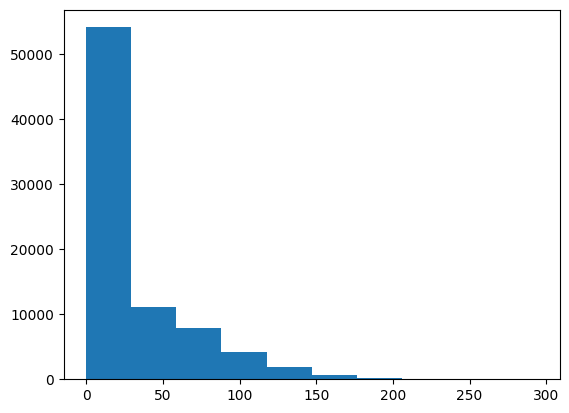

In [ ]:

# Create a histogram
counts, bins, patches = plt.hist(df['call_counts'], bins=10)

# Print the count of numbers in each bin
for count, bin_edge in zip(counts, bins):
    print(f"Bin: [{bin_edge}, {bin_edge + np.diff(bins)[0]}) Count: {int(count)}")

plt.show()

In [ ]:
# for i in range(2, 12):
#   for j in range(i + 1, 12):
#     new_column_name = str(i) + 'x' + str(j)
#     df[new_column_name] = df.iloc[:, i] * df.iloc[:, j]

In [ ]:
df['call_counts']=np.where(df['call_counts']>=180,180,df['call_counts'])

In [ ]:
df.head()

,id,12m_call_history,ann_prm_amt,bi_limit_group,channel,digital_contact_ind,geo_group,has_prior_carrier,home_lot_sq_footage,household_group,...,acq_method_method2,acq_method_method3,acq_method_method4,acq_method_missing,pay_type_code_type1,pay_type_code_type2,pay_type_code_type3,prdct_sbtyp_grp_A,prdct_sbtyp_grp_B,prdct_sbtyp_grp_C
0,1,3,669.21,3,1,1,2,0,57249,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,606.45,3,2,1,3,0,133481,1,...,0,0,1,0,1,0,0,1,0,0
2,3,0,677.06,2,2,0,3,0,18540,2,...,1,0,0,0,0,0,1,1,0,0
3,4,0,1317.32,3,2,0,3,0,63624,1,...,1,0,0,0,1,0,0,0,1,0
4,5,0,2238.37,2,2,0,2,1,4867,2,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df.groupby('has_prior_carrier')['12m_call_history'].mean()

,12m_call_history
has_prior_carrier,
0,2.799437
1,2.776517


In [ ]:
df['sqft_per_ann_prm']=np.where(df['home_lot_sq_footage']==0,0,df['home_lot_sq_footage']/df['ann_prm_amt'])
df['veh_age_per_ann_prm']=np.where(df['newest_veh_age']==0,0,df['newest_veh_age']/df['ann_prm_amt'])
df['Policycount_per_ann_prm']=df['household_policy_counts']/df['ann_prm_amt']
df['house_group_x_newest']=df['household_group']*df['newest_veh_age']
df['policy_count_x_digital']=df['digital_contact_ind']*df['household_policy_counts']

In [ ]:
df.describe()

,id,12m_call_history,ann_prm_amt,bi_limit_group,channel,digital_contact_ind,geo_group,has_prior_carrier,home_lot_sq_footage,household_group,...,pay_type_code_type2,pay_type_code_type3,prdct_sbtyp_grp_A,prdct_sbtyp_grp_B,prdct_sbtyp_grp_C,sqft_per_ann_prm,veh_age_per_ann_prm,Policycount_per_ann_prm,house_group_x_newest,policy_count_x_digital
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,40000.500000,2.787925,1240.613804,2.607287,1.661100,0.366025,2.002950,0.502275,75266.452475,1.521238,...,0.234687,0.138100,0.335062,0.331688,0.333250,165.003076,-0.007755,0.003533,4.755825,0.596650
std,23094.155105,4.183768,1630.911097,0.688691,0.473339,0.481719,0.816655,0.499998,43425.205912,0.720316,...,0.423806,0.345007,0.472015,0.470822,0.471378,271.128184,0.110625,0.005792,61.621841,0.989417
min,1.000000,0.000000,9.080000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.705030,0.000028,-60.000000,0.000000
25%,20000.750000,1.000000,382.907500,2.000000,1.000000,0.000000,1.000000,0.000000,37442.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.778151,-0.040030,0.000881,-20.000000,0.000000
50%,40000.500000,1.000000,753.555000,3.000000,2.000000,0.000000,2.000000,1.000000,75539.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,83.154544,-0.016264,0.001855,-20.000000,0.000000
75%,60000.250000,3.000000,1476.067500,3.000000,2.000000,1.000000,3.000000,1.000000,112882.250000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,191.662307,0.004759,0.003922,16.000000,1.000000
max,80000.000000,86.000000,71839.370000,3.000000,2.000000,1.000000,3.000000,1.000000,149997.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12280.837004,3.480445,0.220264,291.000000,13.000000


In [ ]:
df.columns

Index(['id', '12m_call_history', 'ann_prm_amt', 'bi_limit_group', 'channel',
       'digital_contact_ind', 'geo_group', 'has_prior_carrier',
       'home_lot_sq_footage', 'household_group', 'household_policy_counts',
       'newest_veh_age', 'pol_edeliv_ind', 'telematics_ind',
       'tenure_at_snapshot', 'trm_len_mo', 'call_counts', 'acq_method_method1',
       'acq_method_method2', 'acq_method_method3', 'acq_method_method4',
       'acq_method_missing', 'pay_type_code_type1', 'pay_type_code_type2',
       'pay_type_code_type3', 'prdct_sbtyp_grp_A', 'prdct_sbtyp_grp_B',
       'prdct_sbtyp_grp_C', 'sqft_per_ann_prm', 'veh_age_per_ann_prm',
       'Policycount_per_ann_prm', 'house_group_x_newest',
       'policy_count_x_digital'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       80000 non-null  int64  
 1   12m_call_history         80000 non-null  int64  
 2   ann_prm_amt              80000 non-null  float64
 3   bi_limit_group           80000 non-null  int64  
 4   channel                  80000 non-null  int64  
 5   digital_contact_ind      80000 non-null  int64  
 6   geo_group                80000 non-null  int64  
 7   has_prior_carrier        80000 non-null  int64  
 8   home_lot_sq_footage      80000 non-null  int64  
 9   household_group          80000 non-null  int64  
 10  household_policy_counts  80000 non-null  int64  
 11  newest_veh_age           80000 non-null  int64  
 12  pol_edeliv_ind           80000 non-null  int64  
 13  telematics_ind           80000 non-null  int64  
 14  tenure_at_snapshot    

In [ ]:
# prompt: fit a random forest regressor on the df to predict call_counts

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming 'call_counts' is the target variable
X = df.drop(columns=['call_counts','id','ann_prm_amt','home_lot_sq_footage','newest_veh_age','household_policy_counts','household_group'], axis=1)
y = df['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,
    random_state=42
)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
print("5-Fold Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
print('Train:')
mse_train = mean_squared_error(y_train, train_pred)
r2_score_train = r2_score(y_train, train_pred)
rmse_train = root_mean_squared_error(y_train, train_pred)
print('MSE Train : ',mse_train)
print('R2 Score Train : ',r2_score_train)
print('RMSE Train : ',rmse_train)
print('Test:')
mse_test = mean_squared_error(y_test, test_pred)
r2_score_test = r2_score(y_test, test_pred)
rmse_test = root_mean_squared_error(y_test, test_pred)
print('MSE test : ',mse_test)
print('R2 Score test : ',r2_score_test)
print('RMSE test : ',rmse_test)

5-Fold Cross-Validation R2 Scores: [0.09067599 0.08842774 0.07679498 0.0836074  0.07905159]
Average R2 Score: 0.08371153954943766
Train:
MSE Train :  733.009902222455
R2 Score Train :  0.4832686036300128
RMSE Train :  27.07415561420993
Test:
MSE test :  1298.3276305359625
R2 Score test :  0.08072226760878776
RMSE test :  36.032313699455415


                    Feature  Importance
0          12m_call_history    0.227315
21         sqft_per_ann_prm    0.143221
23  Policycount_per_ann_prm    0.128853
22      veh_age_per_ann_prm    0.124517
8        tenure_at_snapshot    0.116744
24     house_group_x_newest    0.034964
4                 geo_group    0.025935
25   policy_count_x_digital    0.016715
5         has_prior_carrier    0.015661
6            pol_edeliv_ind    0.013612
19        prdct_sbtyp_grp_B    0.011994
18        prdct_sbtyp_grp_A    0.011858
20        prdct_sbtyp_grp_C    0.011773
13       acq_method_method4    0.010624
7            telematics_ind    0.010568
11       acq_method_method2    0.010403
2                   channel    0.010366
14       acq_method_missing    0.010255
15      pay_type_code_type1    0.010166
12       acq_method_method3    0.009997
10       acq_method_method1    0.009993
16      pay_type_code_type2    0.009260
3       digital_contact_ind    0.008634
17      pay_type_code_type3    0.008101


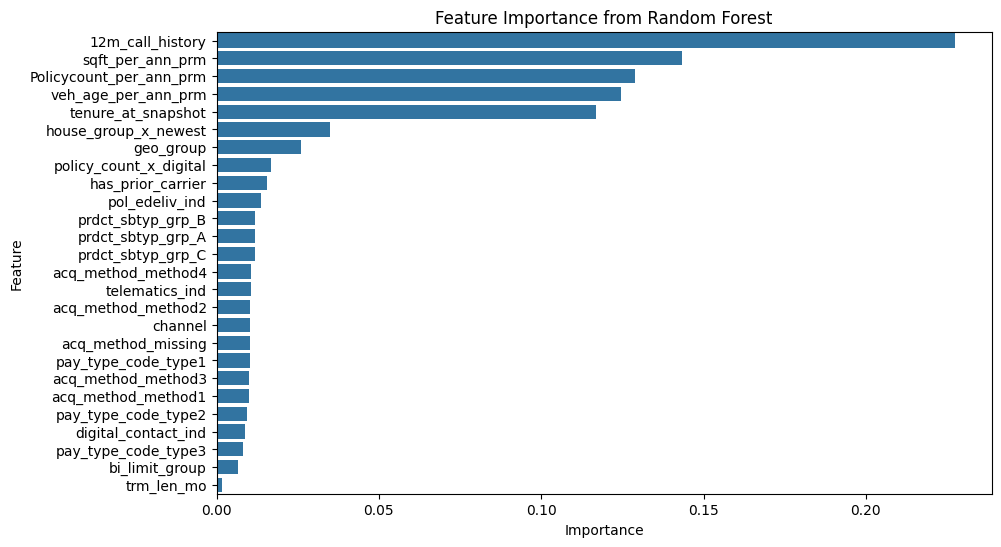

In [ ]:
# prompt: how to get what features are importanct and what are not from the model

# Get feature importances from the trained Random Forest model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Print or display the feature importance DataFrame
print(feature_importance_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

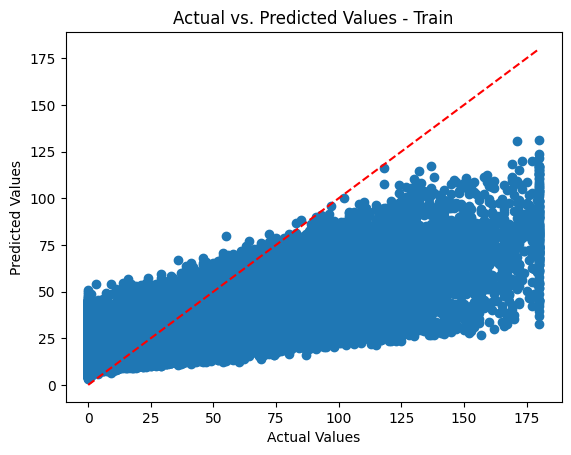

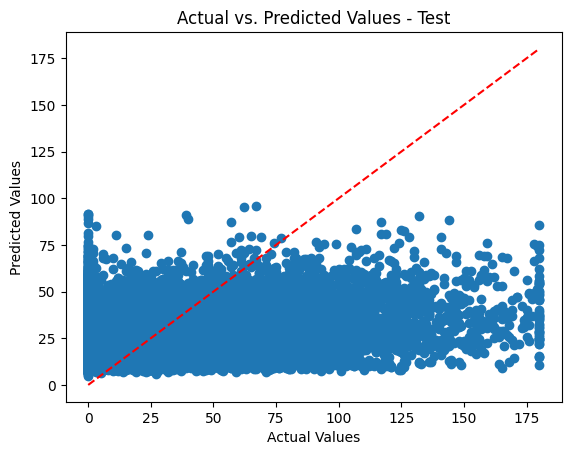

In [ ]:
plt.scatter(y_train, train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Train')
plt.show()

plt.scatter(y_test, test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Test')
plt.show()


## Splitting based on usage

In [ ]:
df['telematics_ind'].value_counts()

,count
telematics_ind,
-2,58015
1,7404
0,7317
-1,7264


In [ ]:
train_df_home=df[df['telematics_ind']==-2]
train_df_auto=df[df['telematics_ind']!=-2]

In [ ]:
train_df_auto.head()

,id,12m_call_history,ann_prm_amt,bi_limit_group,channel,digital_contact_ind,geo_group,has_prior_carrier,home_lot_sq_footage,household_group,...,pay_type_code_type2,pay_type_code_type3,prdct_sbtyp_grp_A,prdct_sbtyp_grp_B,prdct_sbtyp_grp_C,sqft_per_ann_prm,veh_age_per_ann_prm,Policycount_per_ann_prm,house_group_x_newest,policy_count_x_digital
2,3,0,677.06,2,2,0,3,0,18540,2,...,0,1,1,0,0,27.383098,0.011816,0.002954,16,0
4,5,0,2238.37,2,2,0,2,1,4867,2,...,0,0,1,0,0,2.174350,0.024571,0.000894,110,0
5,6,0,1330.18,2,2,0,3,0,32930,2,...,1,0,0,0,1,24.756048,0.000000,0.001504,0,0
9,10,4,2450.21,1,2,0,3,1,64712,2,...,0,0,0,1,0,26.410797,0.030201,0.000816,148,0
10,11,6,1360.21,1,2,0,2,1,99849,2,...,0,0,0,1,0,73.407047,0.003676,0.001470,10,0


In [ ]:
train_df_home.head()

,id,12m_call_history,ann_prm_amt,bi_limit_group,channel,digital_contact_ind,geo_group,has_prior_carrier,home_lot_sq_footage,household_group,...,pay_type_code_type2,pay_type_code_type3,prdct_sbtyp_grp_A,prdct_sbtyp_grp_B,prdct_sbtyp_grp_C,sqft_per_ann_prm,veh_age_per_ann_prm,Policycount_per_ann_prm,house_group_x_newest,policy_count_x_digital
0,1,3,669.21,3,1,1,2,0,57249,1,...,0,0,0,1,0,85.547138,-0.029886,0.001494,-20,1
1,2,0,606.45,3,2,1,3,0,133481,1,...,0,0,1,0,0,220.102234,-0.032979,0.001649,-20,1
3,4,0,1317.32,3,2,0,3,0,63624,1,...,0,0,0,1,0,48.298060,-0.015182,0.000759,-20,0
6,7,3,280.10,3,2,0,2,1,88612,3,...,0,0,0,0,1,316.358443,-0.071403,0.010710,-60,0
7,8,2,1832.98,3,1,1,1,0,139894,1,...,0,1,0,1,0,76.320527,-0.010911,0.000546,-20,1


In [ ]:
train_df_home.columns

Index(['id', '12m_call_history', 'ann_prm_amt', 'bi_limit_group', 'channel',
       'digital_contact_ind', 'geo_group', 'has_prior_carrier',
       'home_lot_sq_footage', 'household_group', 'household_policy_counts',
       'newest_veh_age', 'pol_edeliv_ind', 'telematics_ind',
       'tenure_at_snapshot', 'trm_len_mo', 'call_counts', 'acq_method_method1',
       'acq_method_method2', 'acq_method_method3', 'acq_method_method4',
       'acq_method_missing', 'pay_type_code_type1', 'pay_type_code_type2',
       'pay_type_code_type3', 'prdct_sbtyp_grp_A', 'prdct_sbtyp_grp_B',
       'prdct_sbtyp_grp_C', 'sqft_per_ann_prm', 'veh_age_per_ann_prm',
       'Policycount_per_ann_prm', 'house_group_x_newest',
       'policy_count_x_digital'],
      dtype='object')

In [ ]:
train_df_home.groupby('house_group_x_newest')['home_lot_sq_footage'].mean()

,home_lot_sq_footage
house_group_x_newest,
-60,74840.339633
-20,75301.584130


In [ ]:
# prompt: fit a random forest regressor on the train_df_home to predict call_counts

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming 'call_counts' is the target variable
X = train_df_home.drop(columns=['call_counts','id','ann_prm_amt','home_lot_sq_footage','newest_veh_age','household_policy_counts','household_group','telematics_ind'], axis=1)
y = train_df_home['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,
    random_state=42
)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
print("5-Fold Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
print('Train:')
mse_train = mean_squared_error(y_train, train_pred)
r2_score_train = r2_score(y_train, train_pred)
rmse_train = root_mean_squared_error(y_train, train_pred)
print('MSE Train : ',mse_train)
print('R2 Score Train : ',r2_score_train)
print('RMSE Train : ',rmse_train)
print('Test:')
mse_test = mean_squared_error(y_test, test_pred)
r2_score_test = r2_score(y_test, test_pred)
rmse_test = root_mean_squared_error(y_test, test_pred)
print('MSE test : ',mse_test)
print('R2 Score test : ',r2_score_test)
print('RMSE test : ',rmse_test)

5-Fold Cross-Validation R2 Scores: [0.0714728  0.07808845 0.07886457 0.09349203 0.07208546]
Average R2 Score: 0.0788006627378364
Train:
MSE Train :  658.8016374963325
R2 Score Train :  0.53295039479569
RMSE Train :  25.6671314621703
Test:
MSE test :  1315.9419992045582
R2 Score test :  0.08703311097420918
RMSE test :  36.275914863784735


In [ ]:
# prompt: fit a random forest regressor on the train_df_auto to predict call_counts

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming 'call_counts' is the target variable
X = train_df_auto.drop(columns=['call_counts','id','ann_prm_amt','home_lot_sq_footage','newest_veh_age','household_policy_counts','household_group'], axis=1)
y = train_df_auto['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,
    random_state=42
)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
print("5-Fold Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
print('Train:')
mse_train = mean_squared_error(y_train, train_pred)
r2_score_train = r2_score(y_train, train_pred)
rmse_train = root_mean_squared_error(y_train, train_pred)
print('MSE Train : ',mse_train)
print('R2 Score Train : ',r2_score_train)
print('RMSE Train : ',rmse_train)
print('Test:')
mse_test = mean_squared_error(y_test, test_pred)
r2_score_test = r2_score(y_test, test_pred)
rmse_test = root_mean_squared_error(y_test, test_pred)
print('MSE test : ',mse_test)
print('R2 Score test : ',r2_score_test)
print('RMSE test : ',rmse_test)

5-Fold Cross-Validation R2 Scores: [0.05917035 0.07051136 0.04738556 0.0735266  0.06752691]
Average R2 Score: 0.06362415595690947
Train:
MSE Train :  468.04013071760306
R2 Score Train :  0.6691885016280936
RMSE Train :  21.634235154439896
Test:
MSE test :  1305.2851598904458
R2 Score test :  0.09025401353163531
RMSE test :  36.12873039411219


In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the target variable and features
X = df.drop(columns=['call_counts', 'id', 'ann_prm_amt', 'home_lot_sq_footage',
                     'newest_veh_age', 'household_policy_counts', 'household_group'], axis=1)
y = df['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter search space for Bayesian Optimization
search_space = {
    'n_estimators': Integer(100, 500),  # Number of trees
    'max_depth': Integer(5, 30),        # Maximum depth of trees
    'min_samples_split': Integer(2, 10),  # Minimum samples to split a node
    'min_samples_leaf': Integer(1, 5),    # Minimum samples in a leaf node
    'max_features': Real(0.1, 1.0, prior='uniform')  # Fraction of features to consider
}

# Define the Bayesian Optimization
bayes_opt = BayesSearchCV(
    estimator=rf_regressor,
    search_spaces=search_space,
    n_iter=50,  # Number of iterations
    cv=3,  # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use RMSE as the evaluation metric
    random_state=42,
    verbose=0  # Set to 1 or 2 for more detailed output
)

# Fit the model using Bayesian Optimization
bayes_opt.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", bayes_opt.best_params_)
print("Best Cross-Validated RMSE:", -bayes_opt.best_score_)

# Train the model with the best parameters
best_rf = bayes_opt.best_estimator_

# Make predictions on the test set
test_pred = best_rf.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = best_rf.score(X_test, y_test)

print("\nTest Set Evaluation:")
print("RMSE:", rmse_test)
print("R2 Score:", r2_test)


KeyboardInterrupt: 

In [ ]:
df['ann_prm_amt'].describe()

,ann_prm_amt
count,80000.000000
mean,1240.613804
std,1630.911097
min,9.080000
25%,382.907500
50%,753.555000
75%,1476.067500
max,71839.370000


In [ ]:
train_df_5k=df[df['ann_prm_amt']<=5000]
train_df_10k=df[df['ann_prm_amt']>=5000]

In [ ]:
# prompt: fit a random forest regressor on the train_df_5k to predict call_counts

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming 'call_counts' is the target variable
X = train_df_5k.drop(columns=['call_counts','id','ann_prm_amt','home_lot_sq_footage','newest_veh_age','household_policy_counts','household_group'], axis=1)
y = train_df_5k['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,
    random_state=42
)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
print("5-Fold Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
print('Train:')
mse_train = mean_squared_error(y_train, train_pred)
r2_score_train = r2_score(y_train, train_pred)
rmse_train = root_mean_squared_error(y_train, train_pred)
print('MSE Train : ',mse_train)
print('R2 Score Train : ',r2_score_train)
print('RMSE Train : ',rmse_train)
print('Test:')
mse_test = mean_squared_error(y_test, test_pred)
r2_score_test = r2_score(y_test, test_pred)
rmse_test = root_mean_squared_error(y_test, test_pred)
print('MSE test : ',mse_test)
print('R2 Score test : ',r2_score_test)
print('RMSE test : ',rmse_test)

5-Fold Cross-Validation R2 Scores: [0.08089239 0.08678072 0.07808712 0.08635589 0.07605946]
Average R2 Score: 0.08163511438488505
Train:
MSE Train :  710.5464652446815
R2 Score Train :  0.49996832063954144
RMSE Train :  26.656077454206976
Test:
MSE test :  1266.9630669181563
R2 Score test :  0.0898640800413244
RMSE test :  35.59442466058633


In [ ]:
# prompt: fit a random forest regressor on the train_df_10k to predict call_counts

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming 'call_counts' is the target variable
X = train_df_10k.drop(columns=['call_counts','id','ann_prm_amt','home_lot_sq_footage','newest_veh_age','household_policy_counts','household_group'], axis=1)
y = train_df_10k['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.5,
    random_state=42
)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
print("5-Fold Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
print('Train:')
mse_train = mean_squared_error(y_train, train_pred)
r2_score_train = r2_score(y_train, train_pred)
rmse_train = root_mean_squared_error(y_train, train_pred)
print('MSE Train : ',mse_train)
print('R2 Score Train : ',r2_score_train)
print('RMSE Train : ',rmse_train)
print('Test:')
mse_test = mean_squared_error(y_test, test_pred)
r2_score_test = r2_score(y_test, test_pred)
rmse_test = root_mean_squared_error(y_test, test_pred)
print('MSE test : ',mse_test)
print('R2 Score test : ',r2_score_test)
print('RMSE test : ',rmse_test)

5-Fold Cross-Validation R2 Scores: [0.04574195 0.04420684 0.02726705 0.05519892 0.08604182]
Average R2 Score: 0.051691316926623876
Train:
MSE Train :  403.1104090635692
R2 Score Train :  0.7311680810415692
RMSE Train :  20.07760964516367
Test:
MSE test :  1402.733415045747
R2 Score test :  0.02066561850919857
RMSE test :  37.45308285102505


5-Fold Cross-Validation R2 Scores: [-0.10852849 -0.0907259  -0.10792172 -0.11055231 -0.10370278]
Average R2 Score: -0.10428624153137207
Train:
MSE Train :  171.69754328900927
R2 Score Train :  0.878277063369751
RMSE Train :  13.103340920887668
Test:
MSE test :  1581.3879490224808
R2 Score test :  -0.09712648391723633
RMSE test :  39.76666881978525
                    Feature  Importance
20         sqft_per_ann_prm    0.066093
22  Policycount_per_ann_prm    0.059079
21      veh_age_per_ann_prm    0.057697
7        tenure_at_snapshot    0.049396
16      pay_type_code_type3    0.047652
19        prdct_sbtyp_grp_C    0.047409
18        prdct_sbtyp_grp_B    0.047348
13       acq_method_missing    0.046227
15      pay_type_code_type2    0.045148
17        prdct_sbtyp_grp_A    0.044295
12       acq_method_method4    0.043591
11       acq_method_method3    0.043199
9        acq_method_method1    0.041118
24   policy_count_x_digital    0.040038
10       acq_method_method2    0.038445
23     hou

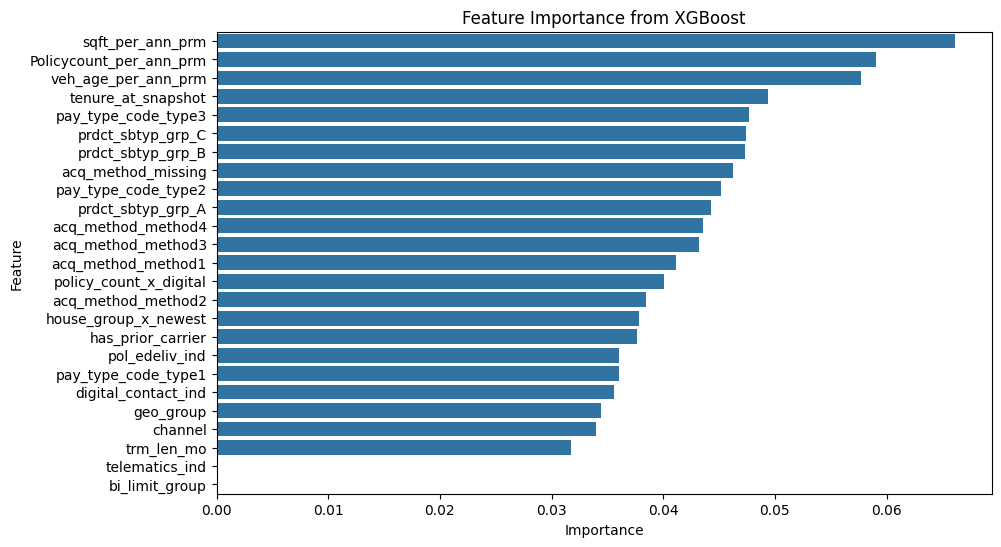

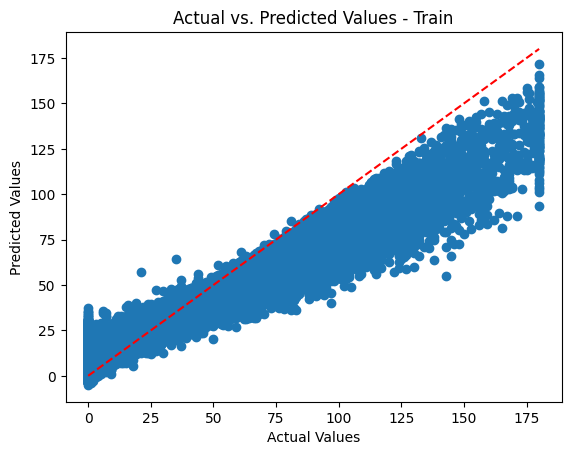

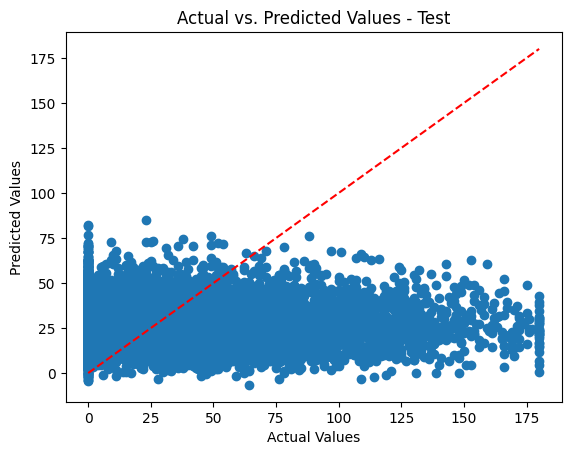

In [ ]:
# prompt: generate an equivalent xgb model for the randomforest model

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming X and y are defined as in the Random Forest example
X = train_df_home.drop(columns=['call_counts','id','ann_prm_amt','home_lot_sq_footage','newest_veh_age','household_policy_counts','household_group','12m_call_history'], axis=1)
y = train_df_home['call_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,  # Similar to n_estimators in Random Forest
    max_depth=15,  # Similar to max_depth in Random Forest
    learning_rate=0.1,  # Adjust learning rate as needed
    subsample=0.8,  # Randomly sample training data for each tree
    colsample_bytree=0.7,  # Randomly sample features for each tree
    random_state=42
)

cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='r2')
print("5-Fold Cross-Validation R2 Scores:", cv_scores)
print("Average R2 Score:", cv_scores.mean())

xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred = xgb_regressor.predict(X_train)
test_pred = xgb_regressor.predict(X_test)

# Evaluate the model
print('Train:')
mse_train = mean_squared_error(y_train, train_pred)
r2_score_train = r2_score(y_train, train_pred)
rmse_train = root_mean_squared_error(y_train, train_pred)
print('MSE Train : ', mse_train)
print('R2 Score Train : ', r2_score_train)
print('RMSE Train : ', rmse_train)
print('Test:')
mse_test = mean_squared_error(y_test, test_pred)
r2_score_test = r2_score(y_test, test_pred)
rmse_test = root_mean_squared_error(y_test, test_pred)
print('MSE test : ', mse_test)
print('R2 Score test : ', r2_score_test)
print('RMSE test : ', rmse_test)


# Get feature importances from the trained XGBoost model
feature_importances = xgb_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_train_df_home = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_train_df_home = feature_importance_train_df_home.sort_values(
    by='Importance', ascending=False
)

# Print or display the feature importance DataFrame
print(feature_importance_train_df_home)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_train_df_home)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.scatter(y_train, train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Train')
plt.show()

plt.scatter(y_test, test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Test')
plt.show()

In [ ]:
_# prompt: i want to check and remove all the outliers in the df

def remove_outliers_iqr(df, column):
  """
  Removes outliers from a DataFrame column using the IQR method.

  Args:
    df: The pandas DataFrame.
    column: The name of the column to remove outliers from.

  Returns:
    A new DataFrame with outliers removed.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.75 * IQR
  upper_bound = Q3 + 1.75 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers


# Assuming 'call_counts' is the target variable
# Loop through columns to remove outliers
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numerical
    df = remove_outliers_iqr(df, column)

# Print the number of rows after removing outliers
print(f"Number of rows after removing outliers: {df.shape[0]}")

Number of rows after removing outliers: 14738


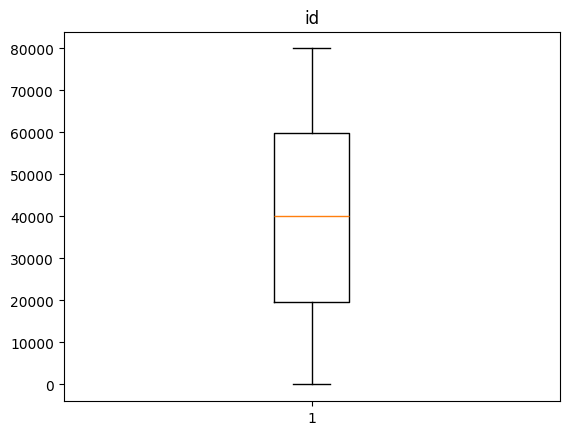

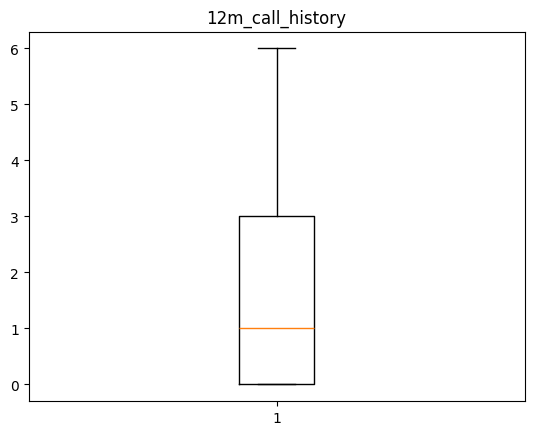

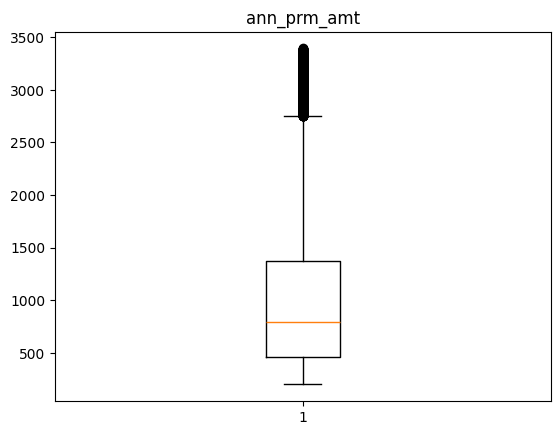

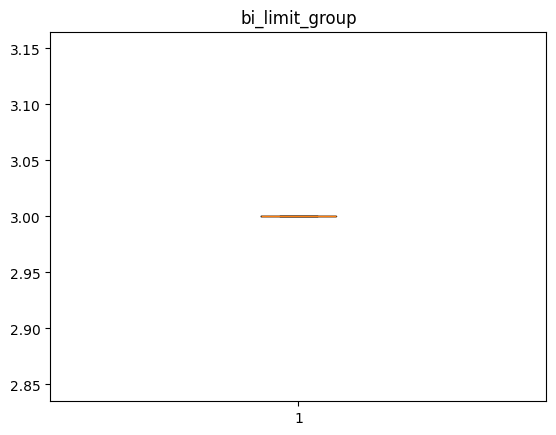

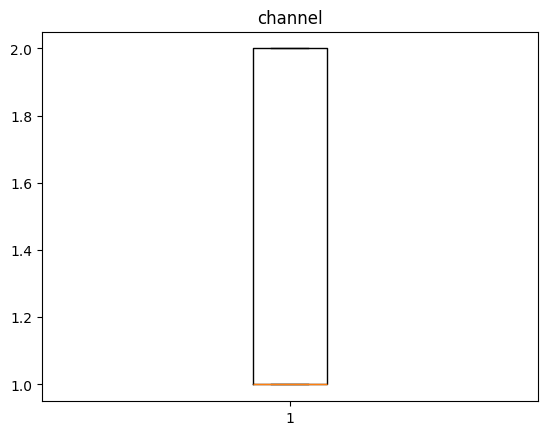

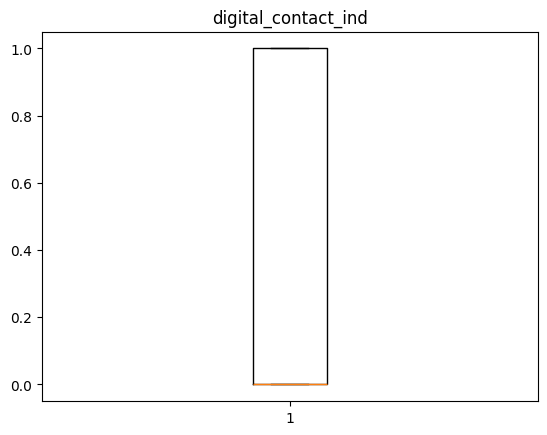

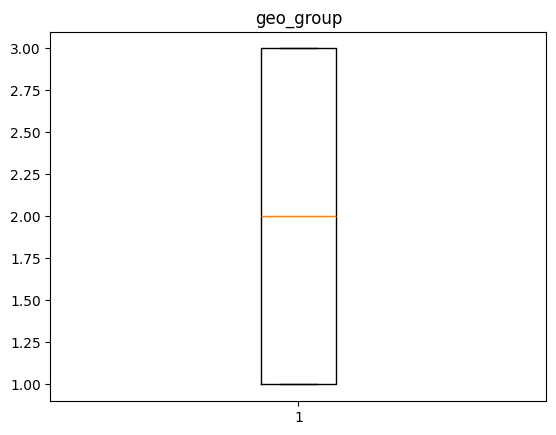

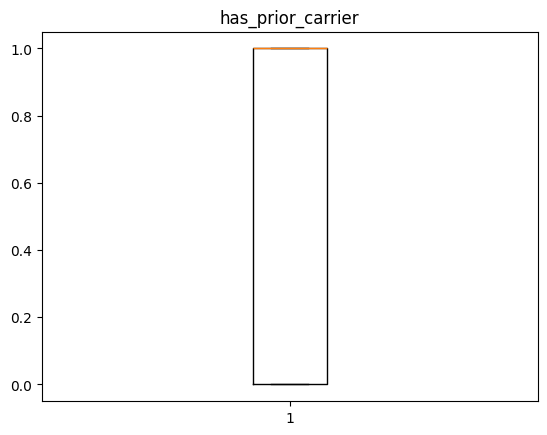

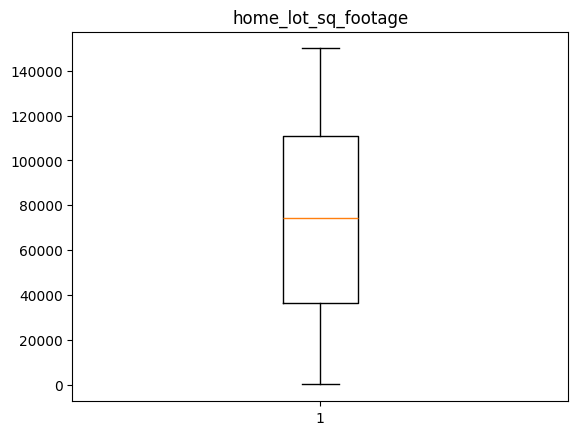

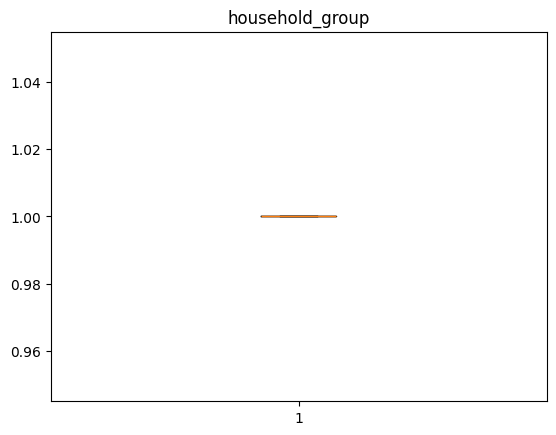

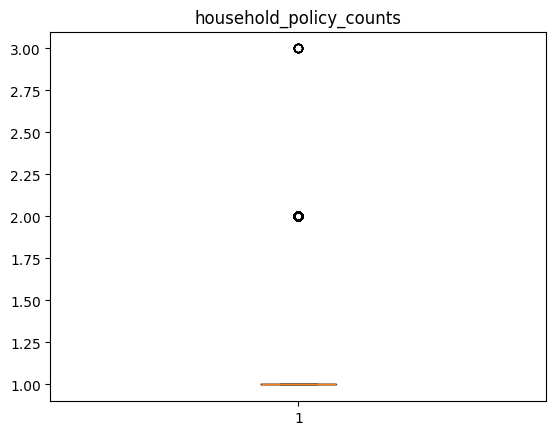

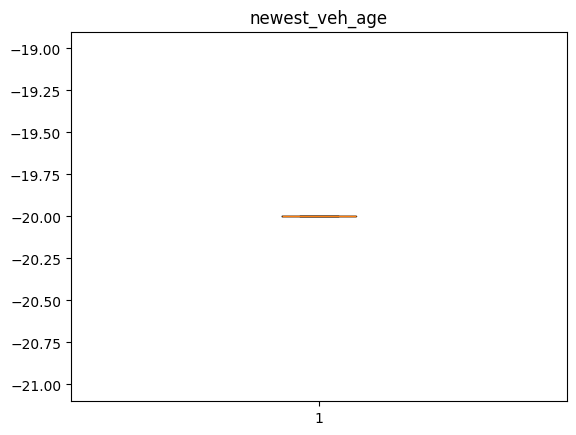

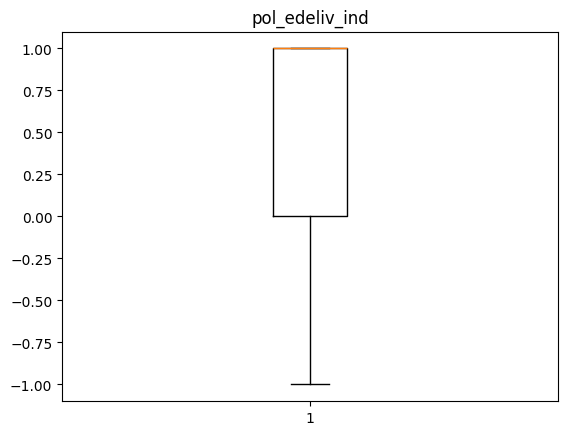

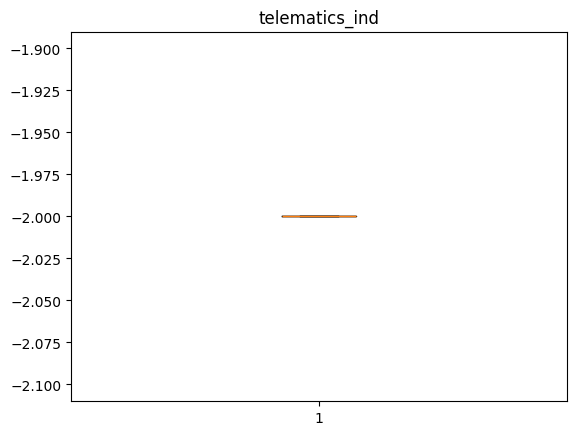

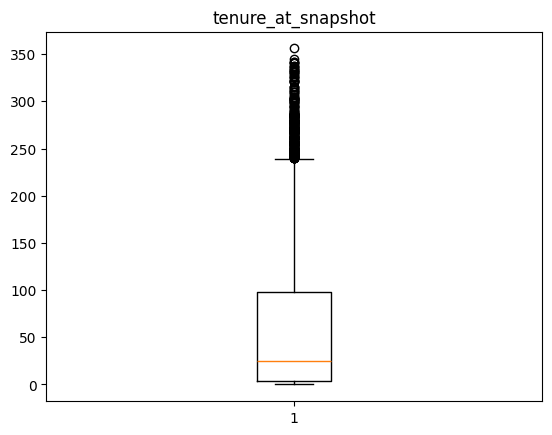

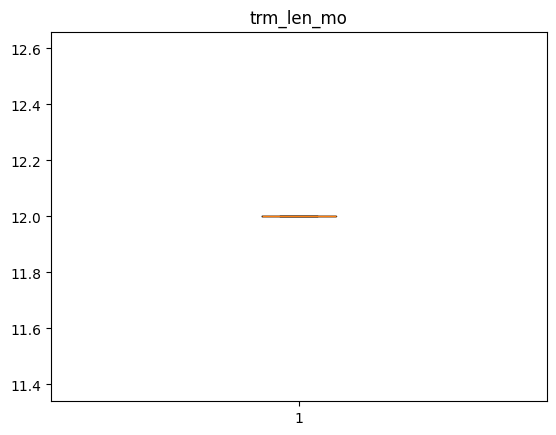

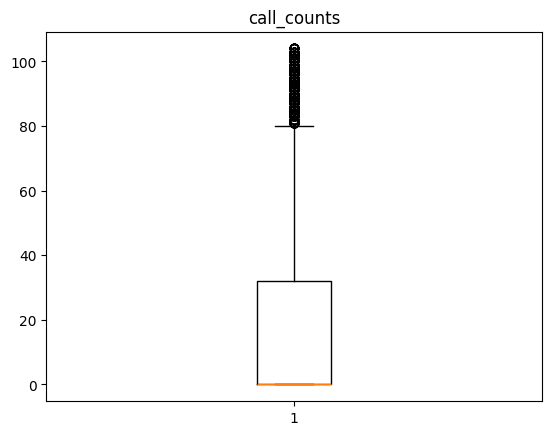

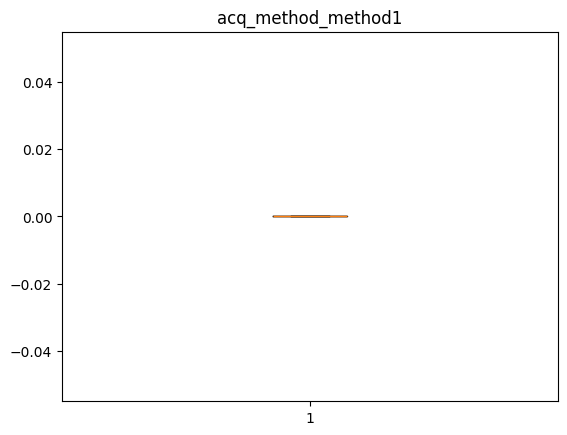

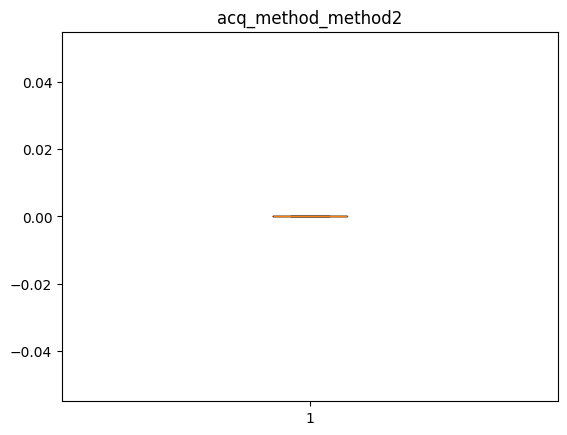

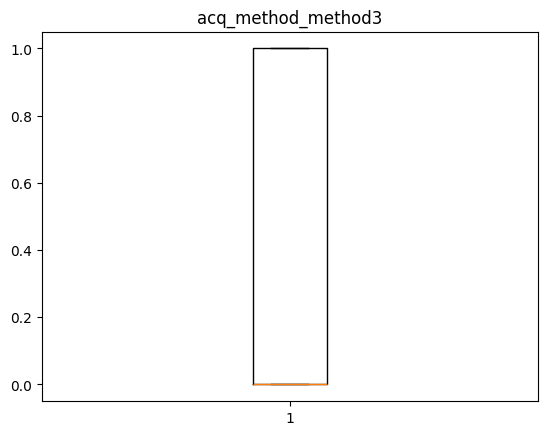

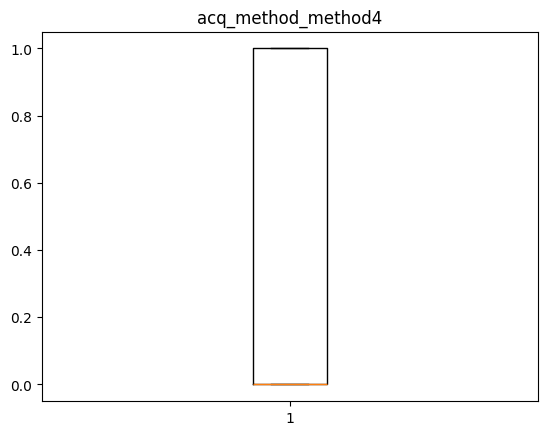

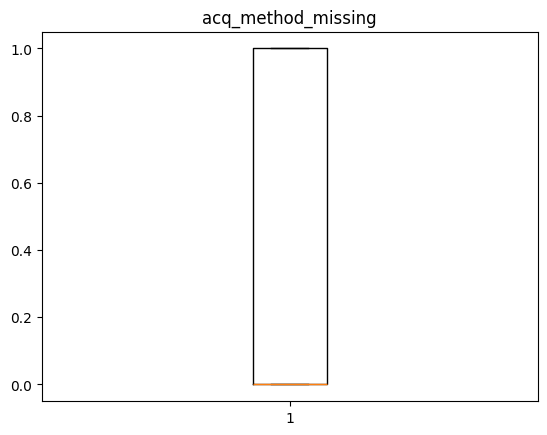

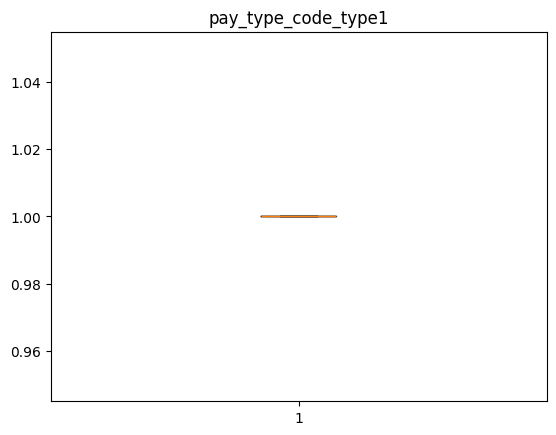

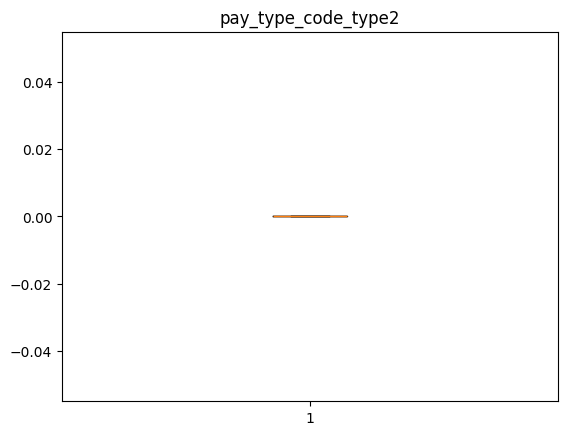

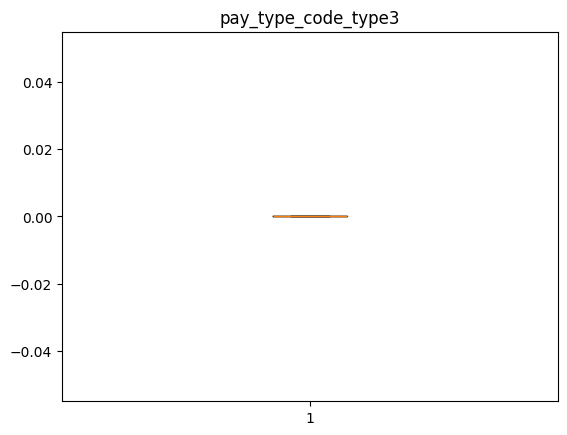

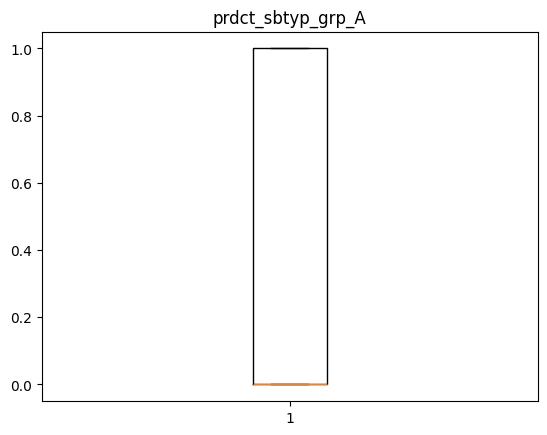

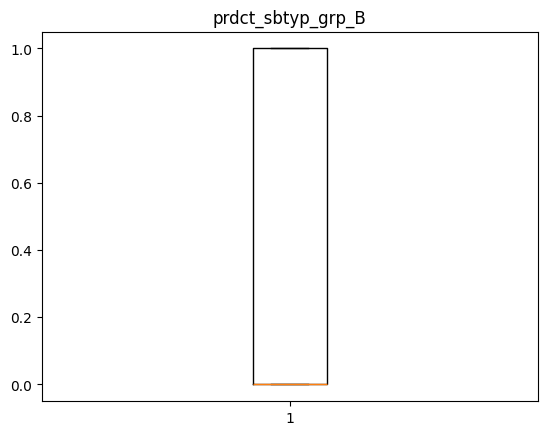

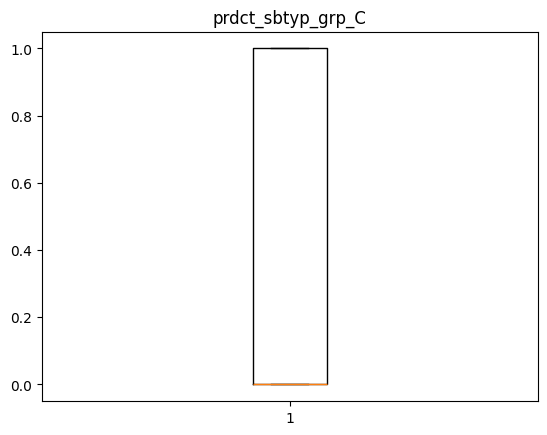

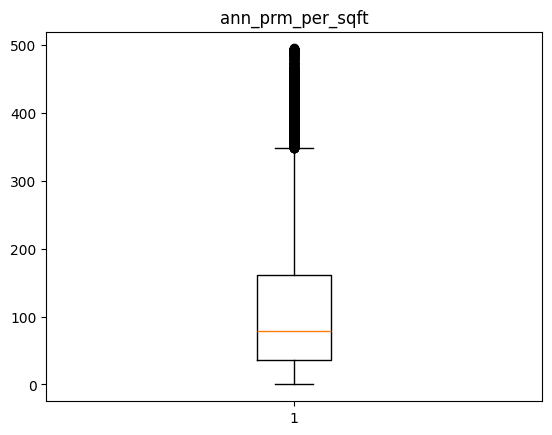

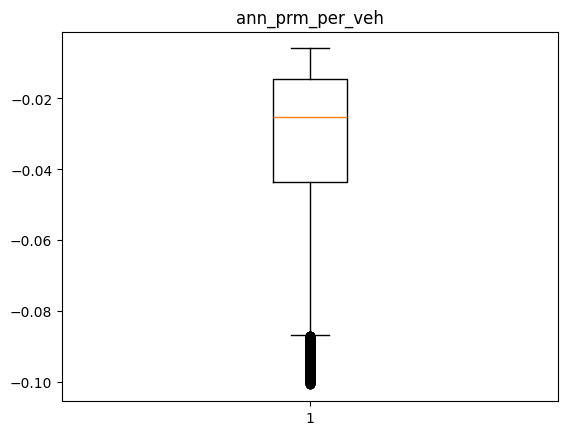

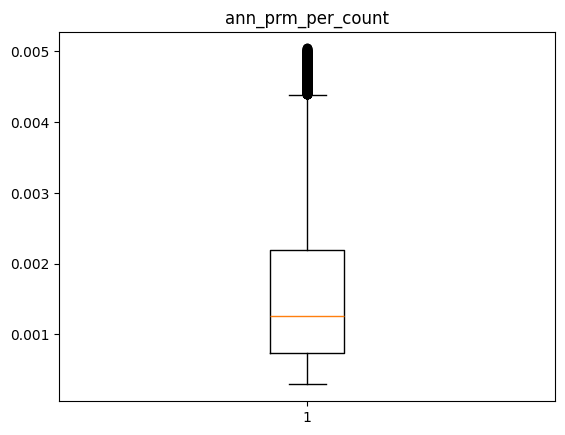

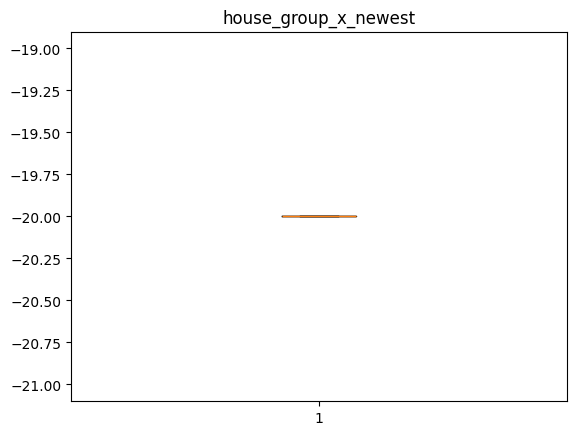

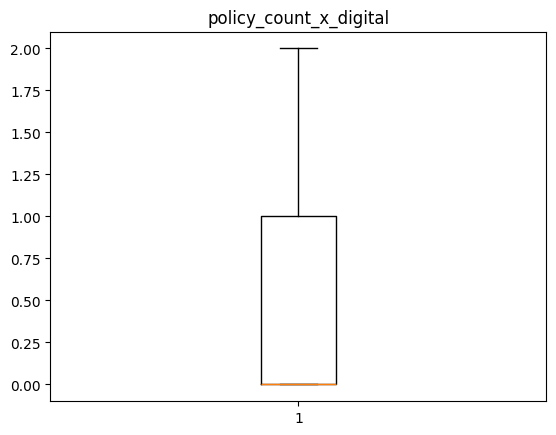

In [ ]:
for column in df.columns:
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()

In [ ]:
# prompt: generate a lasso model for the above random forest model. I want to see the top 10 features

from sklearn.linear_model import Lasso

# Create and train the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_regressor.fit(X_train, y_train)

# Make predictions on the test set
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso = lasso_regressor.predict(X_test)

# Evaluate the model
print('Train:')
mse_train_lasso = mean_squared_error(y_train, train_pred_lasso)
r2_score_train_lasso = r2_score(y_train, train_pred_lasso)
rmse_train_lasso = root_mean_squared_error(y_train, train_pred_lasso)
print('MSE Train : ', mse_train_lasso)
print('R2 Score Train : ', r2_score_train_lasso)
print('RMSE Train : ', rmse_train_lasso)
print('Test:')
mse_test_lasso = mean_squared_error(y_test, test_pred_lasso)
r2_score_test_lasso = r2_score(y_test, test_pred_lasso)
rmse_test_lasso = root_mean_squared_error(y_test, test_pred_lasso)
print('MSE test : ', mse_test_lasso)
print('R2 Score test : ', r2_score_test_lasso)
print('RMSE test : ', rmse_test_lasso)


# Get the coefficients from the Lasso model
lasso_coefficients = lasso_regressor.coef_

# Create a DataFrame to display feature coefficients
feature_coefficients_df = pd.DataFrame(
    {'Feature': X_train.columns, 'Coefficient': lasso_coefficients}
)

# Sort the DataFrame by absolute coefficient value in descending order
feature_coefficients_df['Absolute_Coefficient'] = np.abs(
    feature_coefficients_df['Coefficient']
)
feature_coefficients_df = feature_coefficients_df.sort_values(
    by='Absolute_Coefficient', ascending=False
)

# Print the top 10 features
print(feature_coefficients_df.head(20))


Train:
MSE Train :  1418.4516989611136
R2 Score Train :  7.00879138771926e-05
RMSE Train :  37.66233793806637
Test:
MSE test :  1412.6967969297932
R2 Score test :  -0.00025654349037407265
RMSE test :  37.585859002153896
                   Feature  Coefficient  Absolute_Coefficient
24  policy_count_x_digital     0.149245              0.149245
3                geo_group    -0.008208              0.008208
23    house_group_x_newest    -0.002614              0.002614
7       tenure_at_snapshot    -0.000524              0.000524
20        ann_prm_per_sqft    -0.000444              0.000444
14     pay_type_code_type1    -0.000000              0.000000
22       ann_prm_per_count     0.000000              0.000000
21         ann_prm_per_veh     0.000000              0.000000
19       prdct_sbtyp_grp_C    -0.000000              0.000000
18       prdct_sbtyp_grp_B     0.000000              0.000000
17       prdct_sbtyp_grp_A    -0.000000              0.000000
16     pay_type_code_type3    -0.000

In [ ]:
print(feature_coefficients_df.head(20))

                   Feature  Coefficient  Absolute_Coefficient
24  policy_count_x_digital     0.149245              0.149245
3                geo_group    -0.008208              0.008208
23    house_group_x_newest    -0.002614              0.002614
7       tenure_at_snapshot    -0.000524              0.000524
20        ann_prm_per_sqft    -0.000444              0.000444
14     pay_type_code_type1    -0.000000              0.000000
22       ann_prm_per_count     0.000000              0.000000
21         ann_prm_per_veh     0.000000              0.000000
19       prdct_sbtyp_grp_C    -0.000000              0.000000
18       prdct_sbtyp_grp_B     0.000000              0.000000
17       prdct_sbtyp_grp_A    -0.000000              0.000000
16     pay_type_code_type3    -0.000000              0.000000
15     pay_type_code_type2     0.000000              0.000000
0           bi_limit_group    -0.000000              0.000000
13      acq_method_missing    -0.000000              0.000000
1       

In [ ]:
df.columns

Index(['id', '12m_call_history', 'ann_prm_amt', 'bi_limit_group', 'channel',
       'digital_contact_ind', 'geo_group', 'has_prior_carrier',
       'home_lot_sq_footage', 'household_group', 'household_policy_counts',
       'newest_veh_age', 'pol_edeliv_ind', 'telematics_ind',
       'tenure_at_snapshot', 'trm_len_mo', 'call_counts', 'acq_method_method1',
       'acq_method_method2', 'acq_method_method3', 'acq_method_method4',
       'acq_method_missing', 'pay_type_code_type1', 'pay_type_code_type2',
       'pay_type_code_type3', 'prdct_sbtyp_grp_A', 'prdct_sbtyp_grp_B',
       'prdct_sbtyp_grp_C', 'ann_prm_per_sqft', 'ann_prm_per_veh',
       'ann_prm_per_count', 'house_group_x_newest', 'policy_count_x_digital'],
      dtype='object')